<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Figure-1:-Model-Description" data-toc-modified-id="Figure-1:-Model-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Figure 1: Model Description</a></span></li><li><span><a href="#Figure-2:-Phase-Diagram" data-toc-modified-id="Figure-2:-Phase-Diagram-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Figure 2: Phase Diagram</a></span><ul class="toc-item"><li><span><a href="#Heat-Map" data-toc-modified-id="Heat-Map-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Heat Map</a></span></li><li><span><a href="#Rank-Abundance" data-toc-modified-id="Rank-Abundance-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Rank-Abundance</a></span></li></ul></li><li><span><a href="#Figure-3:-Resources" data-toc-modified-id="Figure-3:-Resources-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Figure 3: Resources</a></span><ul class="toc-item"><li><span><a href="#Bar-Plots" data-toc-modified-id="Bar-Plots-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Bar Plots</a></span><ul class="toc-item"><li><span><a href="#Energy-Limited" data-toc-modified-id="Energy-Limited-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Energy-Limited</a></span></li><li><span><a href="#Syntrophy-Limited" data-toc-modified-id="Syntrophy-Limited-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Syntrophy-Limited</a></span></li><li><span><a href="#Similarity-Limited" data-toc-modified-id="Similarity-Limited-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Similarity-Limited</a></span></li></ul></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Histograms</a></span></li><li><span><a href="#Susceptibilities" data-toc-modified-id="Susceptibilities-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Susceptibilities</a></span></li></ul></li><li><span><a href="#Figure-4:-Niche-Overlap" data-toc-modified-id="Figure-4:-Niche-Overlap-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Figure 4: Niche Overlap</a></span></li><li><span><a href="#Figure-5:-Nestedness" data-toc-modified-id="Figure-5:-Nestedness-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Figure 5: Nestedness</a></span></li><li><span><a href="#Figure-5:-PCA-Plots" data-toc-modified-id="Figure-5:-PCA-Plots-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Figure 5: PCA Plots</a></span></li><li><span><a href="#Figure-6:-Tara-Oceans" data-toc-modified-id="Figure-6:-Tara-Oceans-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Figure 6: Tara Oceans</a></span><ul class="toc-item"><li><span><a href="#Nestedness" data-toc-modified-id="Nestedness-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Nestedness</a></span></li><li><span><a href="#Rank-Abundance" data-toc-modified-id="Rank-Abundance-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Rank-Abundance</a></span></li></ul></li><li><span><a href="#Earth-Microbiome" data-toc-modified-id="Earth-Microbiome-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Earth Microbiome</a></span></li><li><span><a href="#Filtering" data-toc-modified-id="Filtering-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Filtering</a></span></li><li><span><a href="#Supplement" data-toc-modified-id="Supplement-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Supplement</a></span><ul class="toc-item"><li><span><a href="#Plot-matrices" data-toc-modified-id="Plot-matrices-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Plot matrices</a></span></li><li><span><a href="#Dense-metabolism-beta-diversity" data-toc-modified-id="Dense-metabolism-beta-diversity-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Dense metabolism beta diversity</a></span></li><li><span><a href="#Flux-diversity" data-toc-modified-id="Flux-diversity-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Flux diversity</a></span></li><li><span><a href="#Comparison" data-toc-modified-id="Comparison-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>Comparison</a></span></li></ul></li><li><span><a href="#Finite-Size-Scaling" data-toc-modified-id="Finite-Size-Scaling-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Finite-Size Scaling</a></span></li><li><span><a href="#Check-Convergence" data-toc-modified-id="Check-Convergence-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Check Convergence</a></span></li><li><span><a href="#Check-maintenance-cost-of-final-species" data-toc-modified-id="Check-maintenance-cost-of-final-species-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Check maintenance cost of final species</a></span></li></ul></div>

In [2]:
import getpass
from community_simulator.analysis import rsync_in, LoadExperiment, LoadData, FlatResult, CalculateSusceptibility, Jin, CalculateDiversity
from community_simulator.analysis import CalculateConsumptionMeff, CalculateConsumptionNeff, Susceptibility
from community_simulator.visualization import StackPlot, RankAbundance, CompositionPlot, Histogram, PlotTraj, PlotDiversity
from community_simulator.usertools import MakeConsumerDynamics,MakeResourceDynamics,AddLabels,MakeMatrices,BinaryRandomMatrix
from community_simulator import Community
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import k_means
from matplotlib.backends import backend_pdf as bpdf
from matplotlib.colors import ListedColormap
import matplotlib
import pickle
from cycler import cycler
matplotlib.rcParams.update({'font.size': 22})
colors = sns.color_palette("RdBu_r",30)
%matplotlib inline

In [3]:
file_list = pd.read_csv('file_list.csv',index_col=0,dtype=str)

expt = {}
for name in file_list.index:
    expt.update(LoadExperiment(name,file_list))
    
for name in expt.keys():    
    expt[name]['metadata'] = CalculateDiversity(expt[name]['Nflat'],expt[name]['metadata'])
    expt[name]['metadata']['K']=np.round(expt[name]['metadata']['K']) 
    expt[name]['metadata']['Leakage']=np.around(expt[name]['metadata']['Leakage'],decimals=1)

/Users/robertmarsland/Documents/GitHub/community-simulator/community_simulator/analysis.py:115: RuntimeWarning: invalid value encountered in true_divide
  p = N/np.sum(N)
/Users/robertmarsland/Documents/GitHub/community-simulator/community_simulator/analysis.py:119: RuntimeWarning: invalid value encountered in true_divide
  p = N/np.sum(N)
/Users/robertmarsland/Documents/GitHub/community-simulator/community_simulator/analysis.py:120: RuntimeWarning: invalid value encountered in greater
  p = p[p>0]
/Users/robertmarsland/Documents/GitHub/community-simulator/community_simulator/analysis.py:124: RuntimeWarning: invalid value encountered in true_divide
  p = N/np.sum(N)


# Figure 1: Model Description

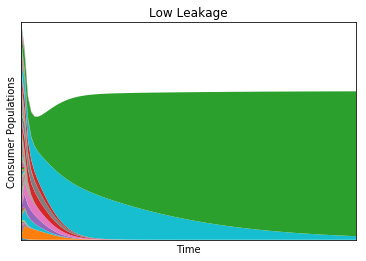

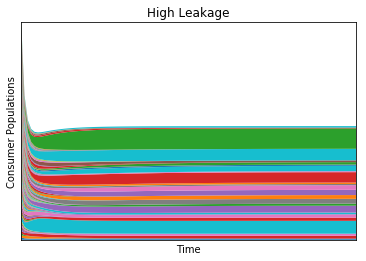

In [30]:
c, D = MakeMatrices(kind = 'Binary')
S = len(c)
n_wells = 1
M = len(D)
N0 = np.ones((S,n_wells))*10
R0 = np.zeros((M,n_wells))
R0[0,:] = 500
N0,R0 = AddLabels(N0,R0,c)
init_state = [N0,R0]

#Construct dynamics
assumptions = {'regulation':'independent','replenishment':'renew','response':'type I'}
def dNdt(N,R,params):
    return MakeConsumerDynamics(**assumptions)(N,R,params)
def dRdt(N,R,params):
    return MakeResourceDynamics(**assumptions)(N,R,params)
dynamics = [dNdt,dRdt]

#Create parameter set
params={'c':c,
        'm':1+0.1*np.random.randn(S),
        'w':1,
        'D':D,
        'g':1,
        'e':0.999,
        'R0':R0.values[:,0],
        'r':1.,
        'tau':1
       }

MyPlate = Community(init_state,dynamics,params)
Ntraj, Rtraj = MyPlate.RunExperiment(np.eye(1),1,100,refresh_resource=False)

PlotTraj(Ntraj,figsize=(6,4))
plt.gca().set_title('Low Leakage')
plt.gca().set_xlabel(r'Time')
plt.gca().set_ylabel('Consumer Populations')
plt.gca().set_xticks(())
plt.show()

MyPlate.params['e'] = 0.2
MyPlate.N = N0
Ntraj, Rtraj = MyPlate.RunExperiment(np.eye(1),1,100,refresh_resource=False)

PlotTraj(Ntraj,figsize=(6,4))
plt.gca().set_title('High Leakage')
plt.gca().set_xlabel(r'Time')
plt.gca().set_ylabel('Consumer Populations')
plt.gca().set_xticks(())
plt.show()

# Figure 2: Phase Diagram

## Heat Map

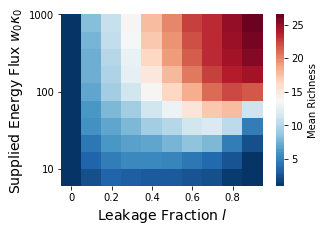

In [41]:
name = 'main_dataset'
colors = sns.color_palette("RdBu_r",100)
fig,ax=plt.subplots(figsize=(5,3.5))
fig.subplots_adjust(left=0.2,bottom = 0.2)

piv = pd.pivot_table(expt[name]['params'], values='Rich',index=["K"],columns=['Leakage'],fill_value=np.nan)
sns.heatmap(piv, ax= ax, cmap=colors,cbar_kws={'label':'Mean Richness'})
ax.invert_yaxis()

ax.set_xlabel(r'Leakage Fraction $l$',fontsize=14)
ax.set_ylabel(r'Supplied Energy Flux $w_0 \kappa_0$',fontsize=14)

ax.set_yticks((1,5.5,10))
ax.set_xticks(np.arange(0,10,2)+0.5)
ax.set_xticklabels((0,0.2,0.4,0.6,0.8))
ax.set_yticklabels((10,100,1000))
pdf = bpdf.PdfPages('Plots/log_heatmap_1.pdf')
pdf.savefig(fig)
pdf.close()


plt.show()

## Rank-Abundance

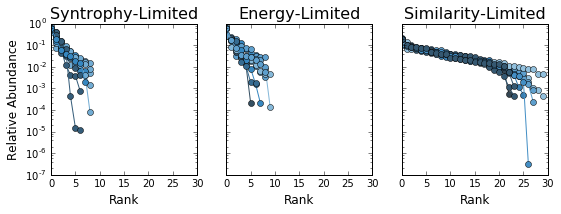

In [4]:
name = 'main_dataset'
fig,axs = plt.subplots(1,3,figsize=(10,3),sharey=True,sharex=True)
fig.subplots_adjust(bottom=0.2,left=0.2,right=0.89)
RankAbundance(expt[name]['Nflat'],expt[name]['metadata'],{'e':0.4,'K':28},title='Energy-Limited',ax=axs[1],fs=12,thresh=0)
RankAbundance(expt[name]['Nflat'],expt[name]['metadata'],{'e':0.9,'K':1000},title='Syntrophy-Limited',ax=axs[0],fs=12,thresh=0)
RankAbundance(expt[name]['Nflat'],expt[name]['metadata'],{'e':0.1,'K':1000},title='Similarity-Limited',ax=axs[2],fs=12,thresh=0)
axs[1].set_ylabel('')
axs[2].set_ylabel('')
#axs[0].set_ylim((0.9e-5,1))
pdf = bpdf.PdfPages('Plots/rank-abundance_'+name+'.pdf')
pdf.savefig(fig)
pdf.close()

# Figure 3: Resources

## Bar Plots

### Energy-Limited

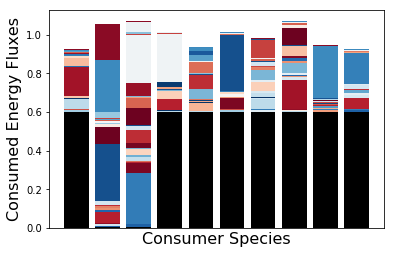

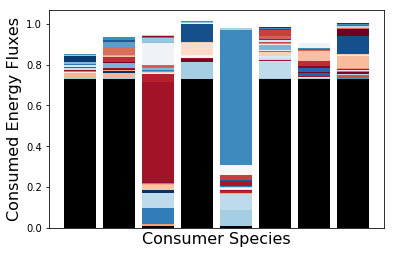

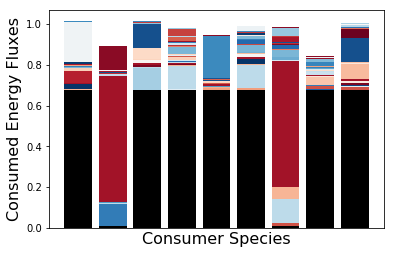

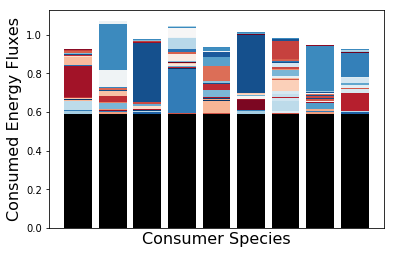

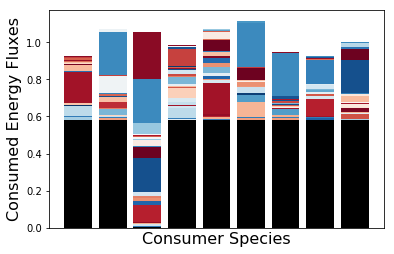

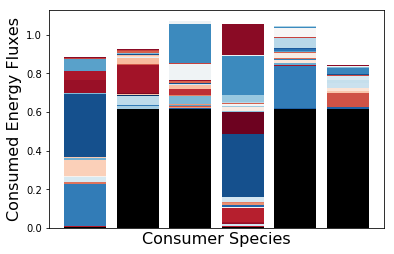

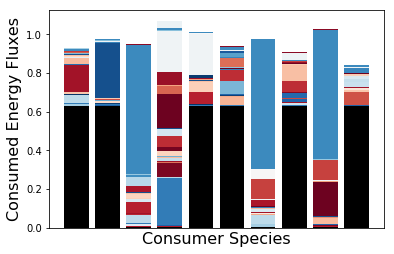

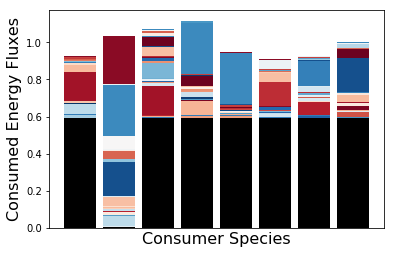

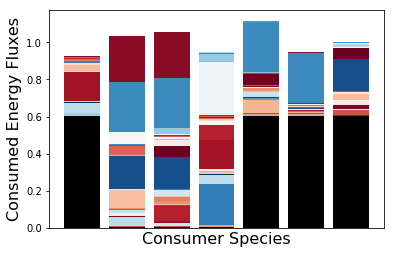

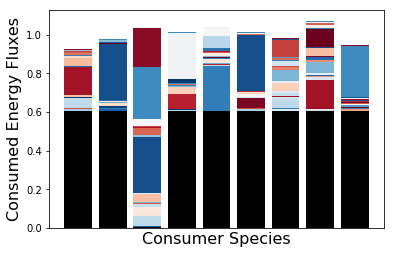

In [44]:
name = 'main_dataset'
run = 23
colors = sns.color_palette("RdBu_r",99)
lookup = np.random.choice(np.arange(99),size=99,replace=False)

for well in ['W'+str(k) for k in range(10)]:
    fig,ax = plt.subplots()

    not_extinct = np.where(expt[name]['N'].loc[run][well].values > 0)[0]
    ind = np.arange(len(not_extinct))

    Jinvec = expt[name]['params'].loc[run]['e']*Jin(expt[name]['R'].loc[run][well].values,expt[name]['sim_params'])[not_extinct,0]
    bottom = Jinvec
    ax.bar(ind,Jinvec,color='k')

    for j in range(2,100):
        Jinvec = expt[name]['params'].loc[run]['e']*Jin(expt[name]['R'].loc[run][well].values,expt[name]['sim_params'])[not_extinct,j]
        ax.bar(ind,Jinvec,bottom = bottom, color = colors[lookup[j-1]])
        bottom += Jinvec
    ax.set_xticks(())
    ax.set_xlabel('Consumer Species',fontsize=16)
    ax.set_ylabel('Consumed Energy Fluxes',fontsize=16)
    #ax.plot(ind,par['m'][not_extinct],'k')
    
    plt.show()

### Syntrophy-Limited

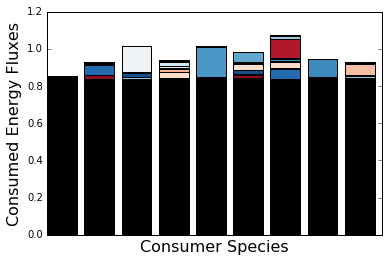

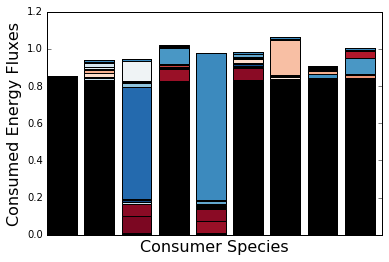

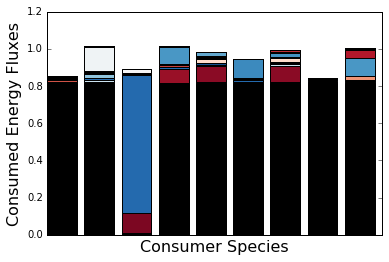

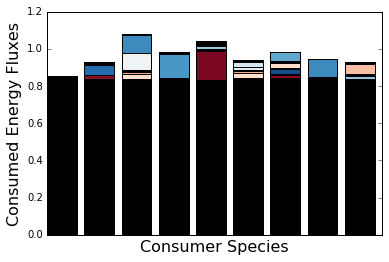

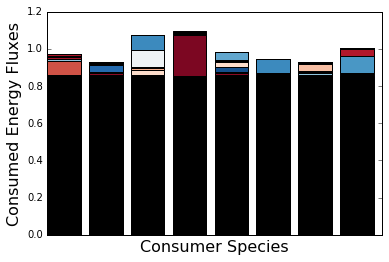

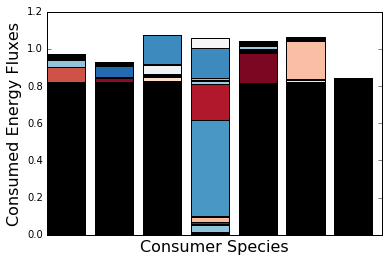

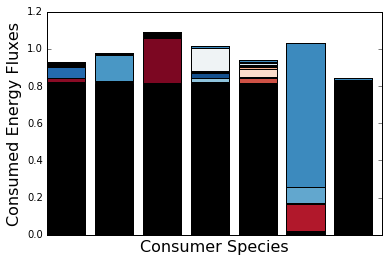

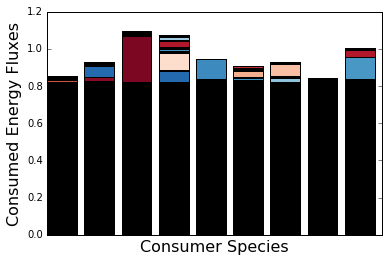

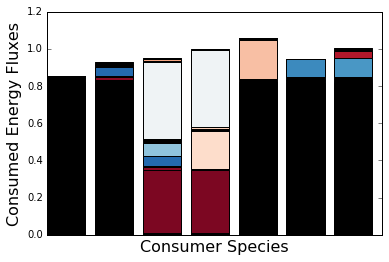

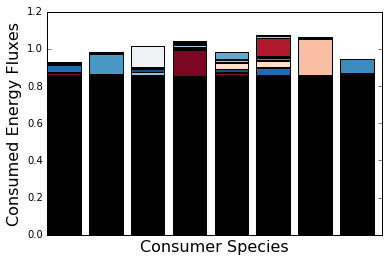

In [5]:
name = 'main_dataset'
run = 98
colors = sns.color_palette("RdBu_r",99)
lookup = np.random.choice(np.arange(99),size=99,replace=False)

for well in ['W'+str(k) for k in range(10)]:
    fig,ax = plt.subplots()

    not_extinct = np.where(expt[name]['N'].loc[run][well].values > 0)[0]
    ind = np.arange(len(not_extinct))

    Jinvec = expt[name]['params'].loc[run]['e']*Jin(expt[name]['R'].loc[run][well].values,expt[name]['sim_params'])[not_extinct,0]
    bottom = Jinvec
    ax.bar(ind,Jinvec,color='k')

    for j in range(2,100):
        Jinvec = expt[name]['params'].loc[run]['e']*Jin(expt[name]['R'].loc[run][well].values,expt[name]['sim_params'])[not_extinct,j]
        ax.bar(ind,Jinvec,bottom = bottom, color = colors[lookup[j-1]])
        bottom += Jinvec
    ax.set_xticks(())
    ax.set_xlabel('Consumer Species',fontsize=16)
    ax.set_ylabel('Consumed Energy Fluxes',fontsize=16)
    #ax.plot(ind,par['m'][not_extinct],'k')
    
    plt.show()

### Similarity-Limited

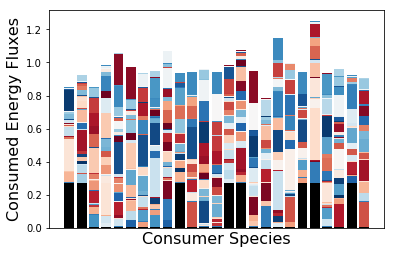

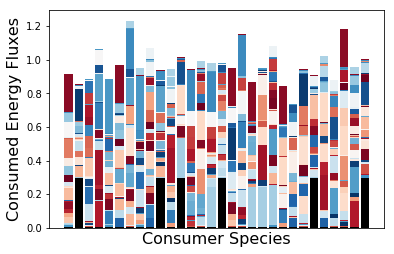

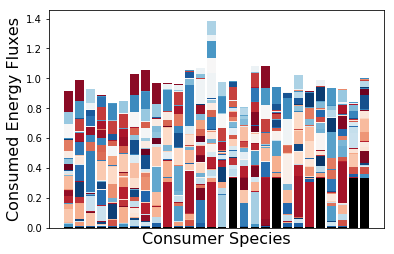

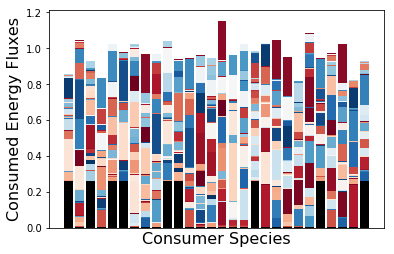

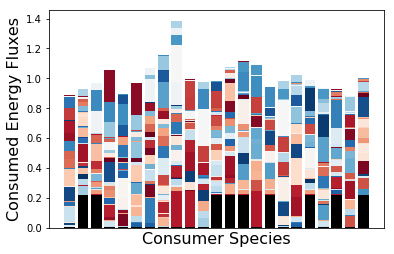

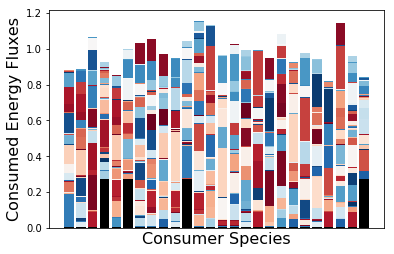

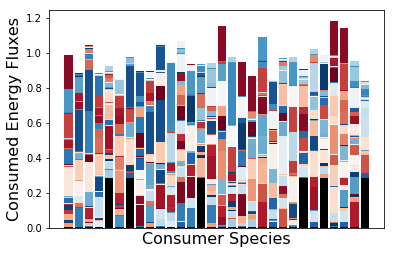

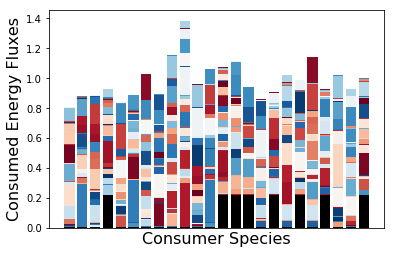

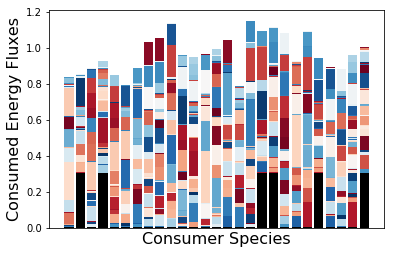

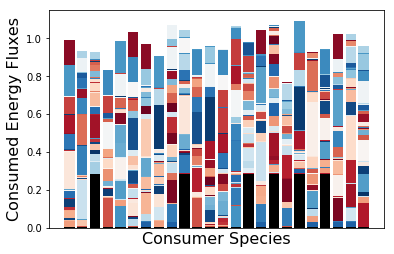

In [45]:
name = 'main_dataset'
run = 90

for well in ['W'+str(k) for k in range(10)]:
    fig,ax = plt.subplots()

    not_extinct = np.where(expt[name]['N'].loc[run][well].values > 0)[0]
    ind = np.arange(len(not_extinct))

    Jinvec = expt[name]['params'].loc[run]['e']*Jin(expt[name]['R'].loc[run][well].values,expt[name]['sim_params'])[not_extinct,0]
    bottom = Jinvec
    ax.bar(ind,Jinvec,color='k')

    for j in range(2,100):
        Jinvec = expt[name]['params'].loc[run]['e']*Jin(expt[name]['R'].loc[run][well].values,expt[name]['sim_params'])[not_extinct,j]
        ax.bar(ind,Jinvec,bottom = bottom, color = colors[lookup[j-1]])
        bottom += Jinvec
    ax.set_xticks(())
    ax.set_xlabel('Consumer Species',fontsize=16)
    ax.set_ylabel('Consumed Energy Fluxes',fontsize=16)
    #ax.plot(ind,par['m'][not_extinct],'k')
    
    plt.show()

## Histograms

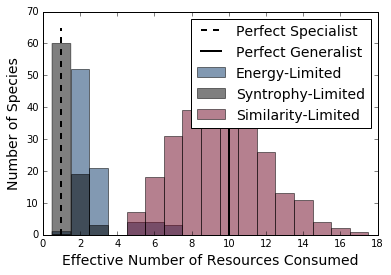

In [7]:
bins = np.linspace(0.5,17.5,18)
fig,ax=plt.subplots()
ax.hist(CalculateConsumptionMeff(expt[name]['N'].loc[23],expt[name]['R'].loc[23],expt[name]['sim_params']),normed=False,bins=bins,alpha=0.5,label = 'Energy-Limited',color=colors[0])
ax.hist(CalculateConsumptionMeff(expt[name]['N'].loc[98],expt[name]['R'].loc[98],expt[name]['sim_params']),normed=False,bins=bins,alpha=0.5,label = 'Syntrophy-Limited',color='k')
ax.hist(CalculateConsumptionMeff(expt[name]['N'].loc[90],expt[name]['R'].loc[90],expt[name]['sim_params']),normed=False,bins=bins,alpha=0.5,label = 'Similarity-Limited',color=colors[-1])
ax.plot([1,1],[0,65],'k--',label='Perfect Specialist',linewidth=2)
ax.plot([10,10],[0,65],'k',label='Perfect Generalist',linewidth=2)
plt.legend(fontsize=14)
ax.set_xlabel('Effective Number of Resources Consumed',fontsize=14)
ax.set_ylabel('Number of Species',fontsize=14)
pdf = bpdf.PdfPages('Plots/flux_diversity_'+name+'.pdf')
pdf.savefig(fig)
pdf.close()
plt.show()
plt.show()

## Susceptibilities

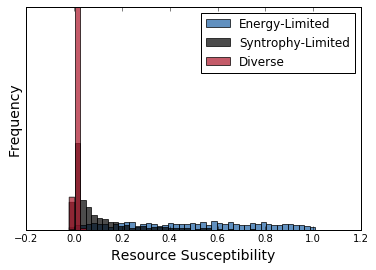

In [22]:
bins = np.linspace(-.02,1.1,50)
colors = sns.color_palette("RdBu_r",10)
fig,ax = plt.subplots()
ax.set_ylabel('Frequency',fontsize=14)
ax.set_xlabel('Resource Susceptibility',fontsize=14)
ax.set_yticks(())

run = 23
chi_diag, chi_off = CalculateSusceptibility(expt[name]['N'].loc[run],expt[name]['R'].loc[run],expt[name]['sim_params'])
ax.hist(chi_diag,alpha = 0.7,bins=bins,normed=True,label='Energy-Limited',color = colors[0])

run = 98
chi_diag, chi_off = CalculateSusceptibility(expt[name]['N'].loc[run],expt[name]['R'].loc[run],expt[name]['sim_params'])
ax.hist(chi_diag,alpha = 0.7,bins=bins,normed=True,label='Syntrophy-Limited',color = 'k')

run = 90
chi_diag, chi_off = CalculateSusceptibility(expt[name]['N'].loc[run],expt[name]['R'].loc[run],expt[name]['sim_params'])
ax.hist(chi_diag,alpha = 0.7,bins=bins,normed=True,label='Diverse',color=colors[-1])
plt.legend(fontsize=12)

pdf = bpdf.PdfPages('Plots/susceptibility_'+name+'.pdf')
pdf.savefig(fig)
pdf.close()
plt.show()

# Figure 4: Niche Overlap

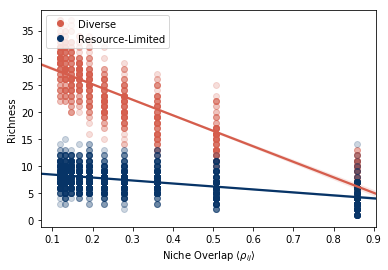

In [59]:
colors = sns.color_palette("RdBu_r",100)

def NicheOverlap(c1,c0=0.01,muc=10,M=100):
    p = muc*1./(M*c1)
    return (p*c1+c0)**2/(p*c1*(c1+2*c0)+c0**2)

fig,ax=plt.subplots()
#fig.subplots_adjust(bottom=0.2)

filenames = {name:file_list.loc[name]['Folder']+'/data_'+file_list.loc[name]['Date']+'_'
             +str(file_list.loc[name]['Task_ID'])+'.xlsx' for name in file_list.index}
c1data_comp = pd.read_excel(filenames['niche_overlap_diverse'],header=0,index_col=0)
c1data_niche = pd.read_excel(filenames['niche_overlap_syntrophy'],header=0,index_col=0)
c1data_energy = pd.read_excel(filenames['niche_overlap_energy'],header=0,index_col=0)
c1data_resource = c1data_niche.append(c1data_energy,ignore_index=True)
c1data_comp['Niche Overlap'] = NicheOverlap(c1data_comp['c1'].values)   
c1data_resource['Niche Overlap'] = NicheOverlap(c1data_resource['c1'].values) 

sns.regplot('Niche Overlap','Consumer Richness',data=c1data_comp,color=colors[80],ax=ax,scatter_kws={'alpha':0.2})
sns.regplot('Niche Overlap','Consumer Richness',data=c1data_resource,color=colors[0],ax=ax,scatter_kws={'alpha':0.2})

ax.plot([],[],'o',label='Diverse',color=colors[80])
ax.plot([],[],'o',label='Resource-Limited',color=colors[0])
ax.set_ylabel('Richness')
ax.set_xlabel(r'Niche Overlap $\langle \rho_{ij}\rangle$')

ax.legend(loc=2)

pdf = bpdf.PdfPages('Plots/overlap.pdf')
pdf.savefig(fig)
pdf.close()
plt.show()

plt.show()

# Figure 5: Nestedness

In [61]:
def PlotNestedness(N,well=None,thresh=0,ax=None):
    if type(well) is str:
        N_all = pd.DataFrame(N[well].loc[0].copy())
        for k in range(1,len(N.index.levels[0])):
            N_all = N_all.join(N[well].loc[k].copy(),rsuffix = '_'+str(k))
    else:
        N_all = N.loc[0].copy()
        for k in range(1,len(N.index.levels[0])):
            N_all = N_all.join(N.loc[k].copy(),rsuffix = '_'+str(k))
    
    species_exist = N_all/N_all.sum() > thresh

    prevalence = species_exist.T.sum()
    richness = species_exist.sum()

    species_exist = species_exist.loc[prevalence > 0]
    prevalence = prevalence.loc[prevalence > 0]

    names = np.array(list(zip(species_exist.keys(),richness)),dtype=[('well','S10'),('richness',int)])
    names_sort = np.asarray(np.sort(names,order='richness')['well'],dtype=str)

    species = np.array(list(zip(np.arange(len(species_exist)),prevalence)),dtype=[('species',int),('prevalence',int)])
    species_sort = np.asarray(np.sort(species,order='prevalence')['species'],dtype=int)
    
    if ax is None:
        fig,ax=plt.subplots()
        
    sns.heatmap(np.asarray(species_exist[names_sort].iloc[species_sort].values,dtype=int),ax=ax,cmap=sns.color_palette("Greys",30),cbar=False)
    ax.invert_yaxis()
    ax.set_yticks(())
    ax.set_xticks(())
    
    return ax

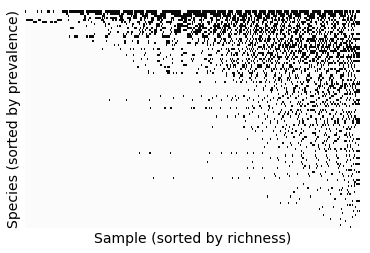

In [62]:
fig,ax = plt.subplots()
PlotNestedness(expt[name]['N'],ax=ax)
#ax.set_title('10 initial communities, 100 different conditions')
ax.set_xlabel('Sample (sorted by richness)',fontsize=14)
ax.set_ylabel('Species (sorted by prevalence)',fontsize=14)
pdf = bpdf.PdfPages('Plots/nested.pdf')
pdf.savefig(fig)
pdf.close()
plt.show()

# Figure 5: PCA Plots

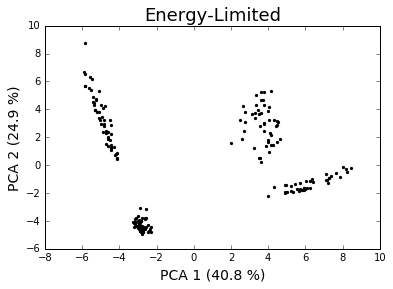

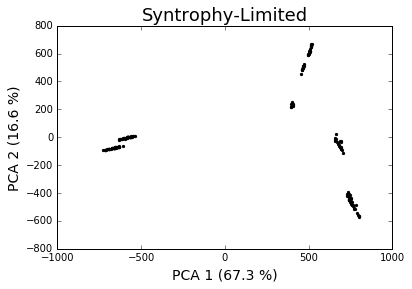

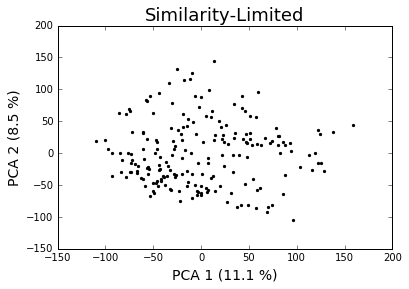

In [9]:
name = 'beta_diversity'
labels=['Energy-Limited','Syntrophy-Limited','Similarity-Limited']
for k in range(3):
    CompositionPlot(expt[name]['N'].loc[k],title=labels[k],bars=False,folder='plots/')

# Figure 6: Tara Oceans

We downloaded the 16S OTU table and metadata from the Tara Oceans Project database, located at http://ocean-microbiome.embl.de/companion.html, and analyzed surface water layer and mesopelagic zone communities using the same scripts employed above for analysis of synthetic data.

In [3]:
ocean = pd.read_table('data/tara_ocean.tsv',header=0,index_col=[0,1,2,3,4,5,6])
ocean.index = ['S'+str(k) for k in range(len(ocean))]
ocean = ocean.reindex(np.random.choice(ocean.index,size=len(ocean.index),replace=False))
ocean=ocean/ocean.sum()
metadata = pd.read_excel('data/tara_ocean_metadata.xlsx',header=0,index_col=0,sheet_name = 'Table W1')

metadata['Class'] = ''
metadata['Climate'] = ''
metadata.loc[metadata['Environmental Feature'].str.contains('ENVO:00002042'),'Class'] = 'Surface water layer'
metadata.loc[metadata['Environmental Feature'].str.contains('ENVO:00000213'),'Class'] = 'Mesopelagic zone'
metadata.loc[np.abs(metadata['Latitude [degrees North]'])<23,'Climate'] = 'Tropical'
metadata.loc[np.logical_and(np.abs(metadata['Latitude [degrees North]'])>23,np.abs(metadata['Latitude [degrees North]'])<66),'Climate'] = 'Temperate'
metadata.loc[metadata['Latitude [degrees North]']>66,'Climate'] = 'Arctic'

## Nestedness

In [15]:
def PlotNestedness(N,thresh=0,ax=None):
    
    species_exist = N/N.sum() > thresh

    prevalence = species_exist.T.sum()
    richness = species_exist.sum()

    species_exist = species_exist.loc[prevalence > 0]
    prevalence = prevalence.loc[prevalence > 0]

    names = np.array(list(zip(species_exist.keys(),richness)),dtype=[('well','S100'),('richness',int)])
    names_sort = np.asarray(np.sort(names,order='richness')['well'],dtype=str)

    species = np.array(list(zip(np.arange(len(species_exist)),prevalence)),dtype=[('species',int),('prevalence',int)])
    species_sort = np.asarray(np.sort(species,order='prevalence')['species'],dtype=int)
    
    if ax is None:
        fig,ax=plt.subplots()
        
    sns.heatmap(np.asarray(species_exist[names_sort].iloc[species_sort].values,dtype=int),ax=ax,cmap=sns.color_palette("Greys",30),cbar=False)
    ax.invert_yaxis()
    ax.set_yticks(())
    ax.set_xticks(())
    
    return np.asarray(species_exist[names_sort].iloc[species_sort].values,dtype=int)

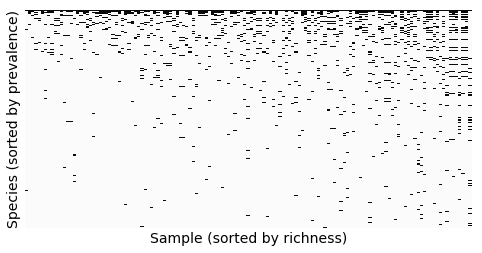

In [17]:
fig,ax = plt.subplots(figsize=(8,4))
nest = PlotNestedness(ocean,ax=ax,thresh = 5e-3)

sns.heatmap(nest,ax=ax,cmap=sns.color_palette("Greys",30),cbar=False)
ax.invert_yaxis()
ax.set_yticks(())
ax.set_xticks(())
ax.set_xlabel('Sample (sorted by richness)',fontsize=14)
ax.set_ylabel('Species (sorted by prevalence)',fontsize=14)
pdf = bpdf.PdfPages('Plots/nested_ocean.pdf')
pdf.savefig(fig)
pdf.close()
plt.show()

## Rank-Abundance

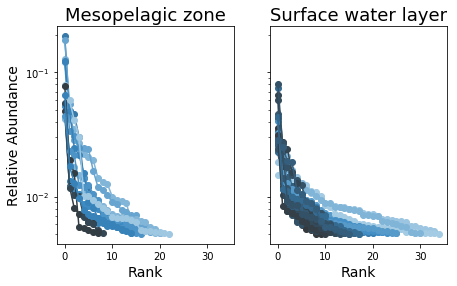

In [4]:
fig,axs = plt.subplots(1,2,figsize=(7,4),sharey=True,sharex=True)
RankAbundance(ocean.T,metadata,{'Class':'Surface water layer','Climate':'Tropical'},title='Surface water layer',ax=axs[1],fs=14,thresh=5e-3)
RankAbundance(ocean.T,metadata,{'Class':'Mesopelagic zone','Climate':'Tropical'},title='Mesopelagic zone',ax=axs[0],fs=14,thresh=5e-3)
axs[1].set_ylabel('')
pdf = bpdf.PdfPages('Plots/rank-abundance_data.pdf')
pdf.savefig(fig)
pdf.close()

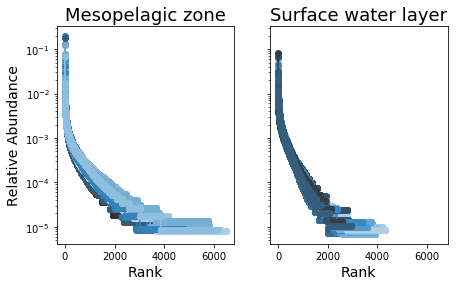

In [19]:
fig,axs = plt.subplots(1,2,figsize=(7,4),sharey=True,sharex=True)
RankAbundance(ocean.T,metadata,{'Class':'Surface water layer','Climate':'Tropical'},title='Surface water layer',ax=axs[1],fs=14,thresh=0)
RankAbundance(ocean.T,metadata,{'Class':'Mesopelagic zone','Climate':'Tropical'},title='Mesopelagic zone',ax=axs[0],fs=14,thresh=0)
axs[1].set_ylabel('')
pdf = bpdf.PdfPages('Plots/rank-abundance_data_all.pdf')
pdf.savefig(fig)
pdf.close()

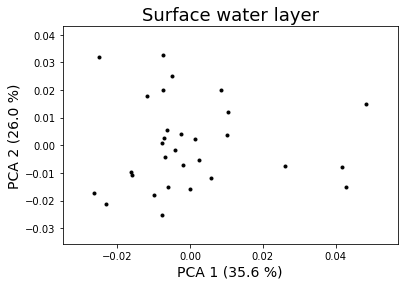

In [5]:
CompositionPlot(ocean.T.loc[np.logical_and(metadata['Class']=='Surface water layer',metadata['Climate']=='Tropical')].T,
                title='Surface water layer',drop_zero=True,thresh=5e-3,n_wells=14,bars=False,folder='plots/')
plt.show()

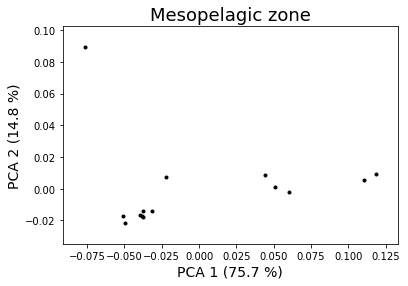

In [25]:
CompositionPlot(ocean.T.loc[np.logical_and(metadata['Class']=='Mesopelagic zone',metadata['Climate']=='Tropical')].T,
                title='Mesopelagic zone',drop_zero=True,thresh=5e-3,n_wells=14,bars=False,folder='plots/')
plt.show()

# Earth Microbiome

We downloaded this data from the Earth Microbiome github (https://github.com/biocore/emp/) to see what typical ranges of microbial diversity are like in natural environments.

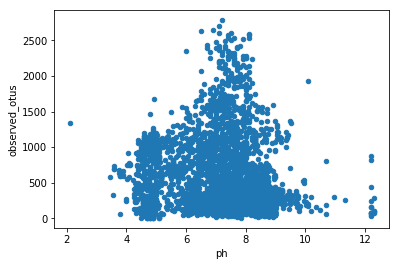

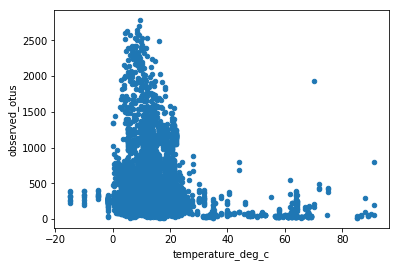

In [26]:
path_map = 'data/emp_qiime_mapping_qc_filtered.tsv'
path_adiv = 'data/emp.90.min25.deblur.withtax.onlytree_5000.txt'

df_map = pd.read_csv(path_map, sep='\t', index_col=0, low_memory=False)
df_adiv = pd.read_csv(path_adiv, sep='\t', index_col=0)
df_merged = pd.merge(df_map, df_adiv, how='inner', left_index=True, right_index=True)

df_merged.plot.scatter('ph','observed_otus')
plt.show()
df_merged.plot.scatter('temperature_deg_c','observed_otus')
plt.show()

The samples above 40 deg. C have very low richness -- lets make a histogram of the richnesses of just these samples:

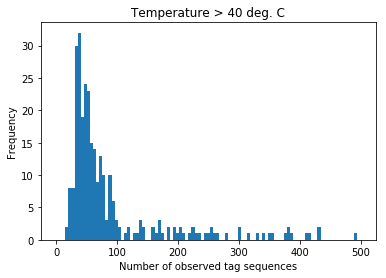

In [27]:
df_merged[df_merged['temperature_deg_c'] > 40]['observed_otus'].plot.hist(bins=np.linspace(0,500,100))
plt.gca().set_xlabel('Number of observed tag sequences')
plt.gca().set_title('Temperature > 40 deg. C')
plt.show()

We can also look at the nestedness. This plot is made in a way that's very hard to change the size, but we can do it in illustrator just fine.

In [28]:
data = pd.read_csv('data/nest_phylum_allsamples.csv')  

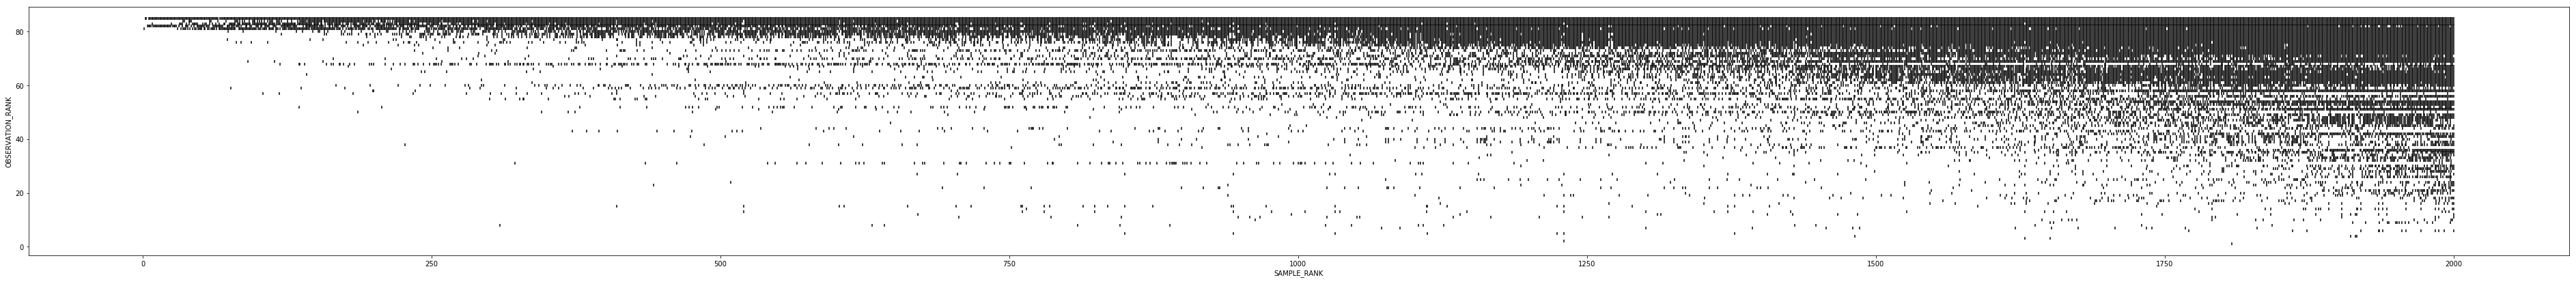

In [29]:
fig,ax=plt.subplots(figsize=(data.SAMPLE_RANK.max()/30,data.OBSERVATION_RANK.max()/12.7))
data.plot.scatter('SAMPLE_RANK','OBSERVATION_RANK',marker='|',linewidths=2,ax=ax,color='k')
pdf = bpdf.PdfPages('Plots/nestedness_emp.pdf')
pdf.savefig(fig)
pdf.close()
plt.show()

# Filtering

We also checked to see what happens if you change the externally supplied resource type, for ten initial conditions in the diverse phase.

In [34]:
name = 'filtering_diverse'

metagenome = expt[name]['Nflat'].dot(expt[name]['sim_params'][0]['c'])
metagenome = (metagenome.T/metagenome.T.sum()).T
expt[name]['metadata']['Food Type'] = np.floor(expt[name]['metadata']['Food']/10)

perplexity=50
N_PCA = pd.DataFrame(PCA(n_components=2).fit_transform(expt[name]['Nflat'].values),columns=['OTU PCA 1','OTU PCA 2'],index=expt[name]['Nflat'].index)
N_TSNE = pd.DataFrame(TSNE(perplexity=perplexity).fit_transform(expt[name]['Nflat'].values),columns=['OTU t-SNE 1','OTU t-SNE 2'],index=expt[name]['Nflat'].index)
MG_PCA = pd.DataFrame(PCA(n_components=2).fit_transform(metagenome.values),columns=['Metagenome PCA 1','Metagenome PCA 2'],index=metagenome.index)
MG_TSNE = pd.DataFrame(TSNE(perplexity=perplexity).fit_transform(metagenome.values),columns=['Metagenome t-SNE 1','Metagenome t-SNE 2'],index=metagenome.index)
expt[name]['dim_red'] = expt[name]['metadata'].join(N_PCA).join(N_TSNE).join(MG_PCA).join(MG_TSNE)

NameError: name 'metadata_1' is not defined

We colored each point by the initial state of the community. We see that a given community always has similar metagenomes and similar compositions in the diverse phase regardless of which resource is externally supplied.

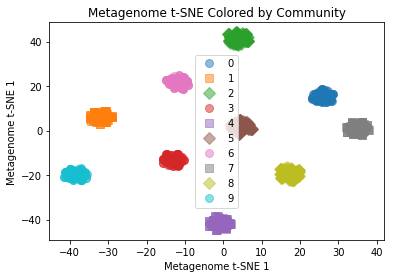

In [45]:
colorby = 'Community'
data_name = 'Metagenome t-SNE'
markers = ['o','s','D']*10

groups = expt[name]['dim_red'].groupby(colorby)
fig, ax = plt.subplots()
k=0
for label, group in groups:
    ax.plot(group[data_name+' 1'], group[data_name+' 2'], marker=markers[k], linestyle='', ms=8, label=label, alpha = 0.5)
    k+=1
ax.set_xlabel(data_name+' 1')
ax.set_ylabel(data_name+' 1')
ax.legend()
ax.set_title(data_name + ' Colored by '+colorby)

plt.show()

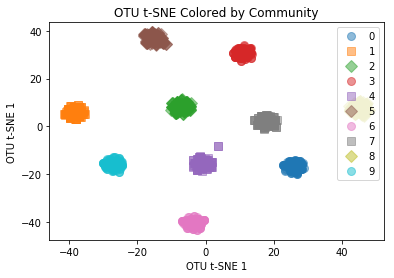

In [48]:
colorby = 'Community'
data_name = 'OTU t-SNE'
markers = ['o','s','D']*10

groups = expt[name]['dim_red'].groupby(colorby)
fig, ax = plt.subplots()
k=0
for label, group in groups:
    ax.plot(group[data_name+' 1'], group[data_name+' 2'], marker=markers[k], linestyle='', ms=8, label=label, alpha = 0.5)
    k+=1
ax.set_xlabel(data_name+' 1')
ax.set_ylabel(data_name+' 1')
ax.legend()
ax.set_title(data_name + ' Colored by '+colorby)

plt.show()

# Supplement

## Plot matrices

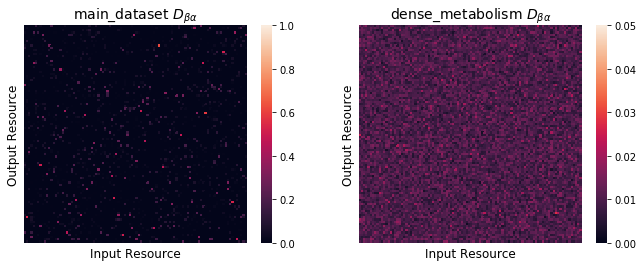

In [56]:
fig,ax=plt.subplots(1,2,figsize=(11,4))
sns.heatmap(expt['main_dataset']['sim_params']['D'],ax=ax[0],vmin=0,vmax=1)
sns.heatmap(expt['dense_metabolism']['sim_params']['D'],ax=ax[1],vmin=0,vmax=0.05)
for k in range(2):
    ax[k].set_xticks(())
    ax[k].set_yticks(())
    ax[k].set_xlabel('Input Resource',fontsize=12)
    ax[k].set_ylabel('Output Resource',fontsize=12)
ax[0].set_title(r'main_dataset $D_{\beta\alpha}$',fontsize=14)
ax[1].set_title(r'dense_metabolism $D_{\beta\alpha}$',fontsize=14)

pdf = bpdf.PdfPages('Plots/D_matrix.pdf')
pdf.savefig(fig)
pdf.close()
plt.show()

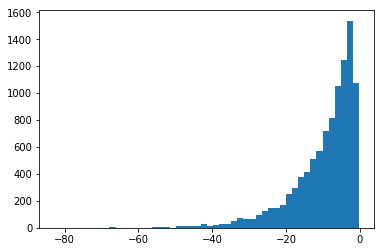

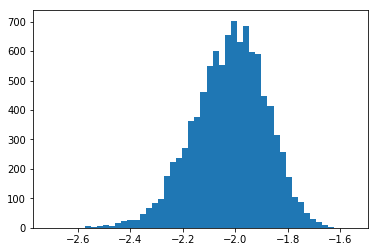

In [13]:
plt.hist(np.log10(expt['main_dataset']['sim_params']['D'].values.reshape(-1)),bins=50)
plt.show()

plt.hist(np.log10(expt['dense_metabolism']['sim_params']['D'].values.reshape(-1)),bins=50)
plt.show()

## Dense metabolism beta diversity 

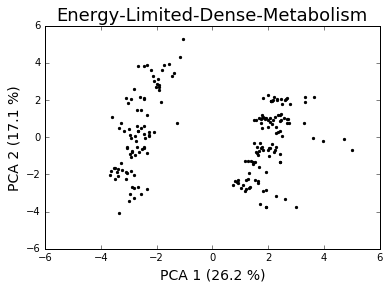

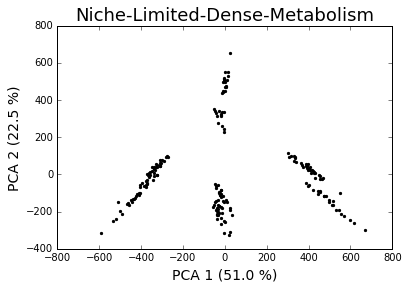

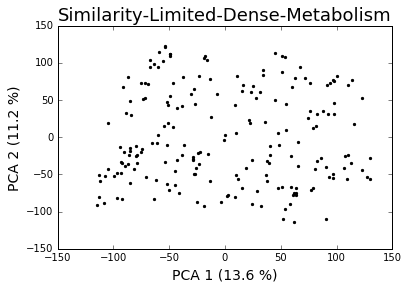

In [10]:
labels=['Energy-Limited-Dense-Metabolism','Niche-Limited-Dense-Metabolism','Similarity-Limited-Dense-Metabolism']
for k in range(3):
    CompositionPlot(expt['beta_diversity_dense']['N'].loc[k],title=labels[k],bars=False,folder='plots/')

## Flux diversity

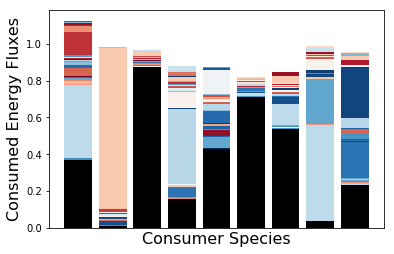

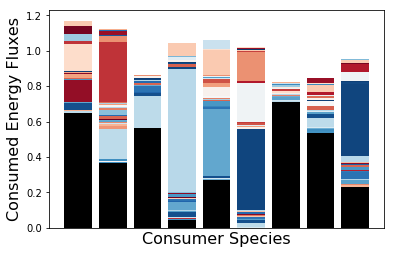

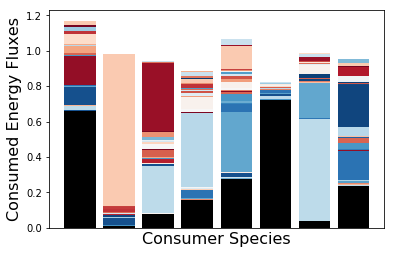

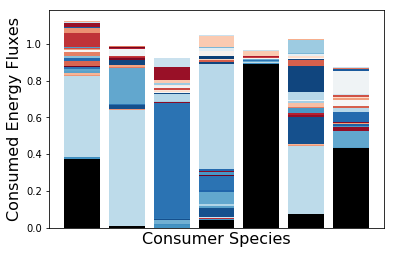

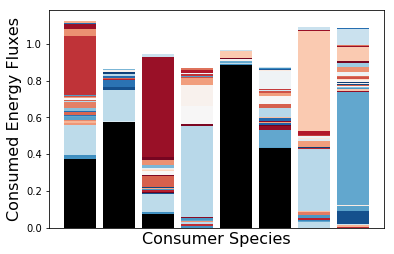

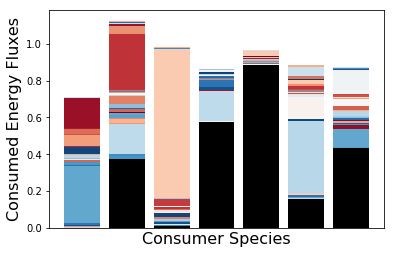

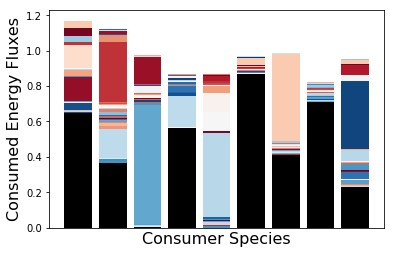

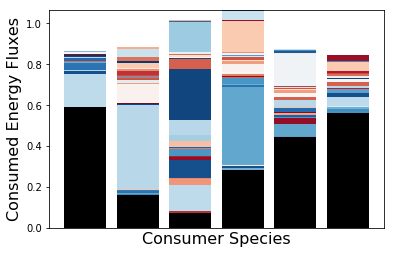

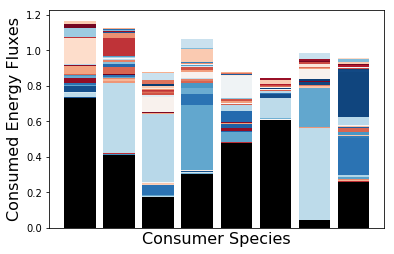

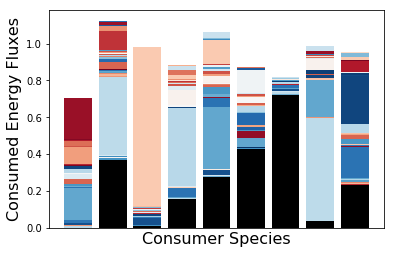

In [59]:
name = 'Gamma_sampling'
run = 23
colors = sns.color_palette("RdBu_r",99)
lookup = np.random.choice(np.arange(99),size=99,replace=False)

for well in ['W'+str(k) for k in range(10)]:
    fig,ax = plt.subplots()

    not_extinct = np.where(expt[name]['N'].loc[run][well].values > 0)[0]
    ind = np.arange(len(not_extinct))

    Jinvec = expt[name]['params'].loc[run]['e']*Jin(expt[name]['R'].loc[run][well].values,expt[name]['sim_params'])[not_extinct,0]
    bottom = Jinvec
    ax.bar(ind,Jinvec,color='k')

    for j in range(2,100):
        Jinvec = expt[name]['params'].loc[run]['e']*Jin(expt[name]['R'].loc[run][well].values,expt[name]['sim_params'])[not_extinct,j]
        ax.bar(ind,Jinvec,bottom = bottom, color = colors[lookup[j-1]])
        bottom += Jinvec
    ax.set_xticks(())
    ax.set_xlabel('Consumer Species',fontsize=16)
    ax.set_ylabel('Consumed Energy Fluxes',fontsize=16)
    #ax.plot(ind,par['m'][not_extinct],'k')
    
    plt.show()

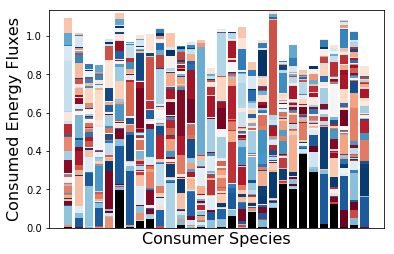

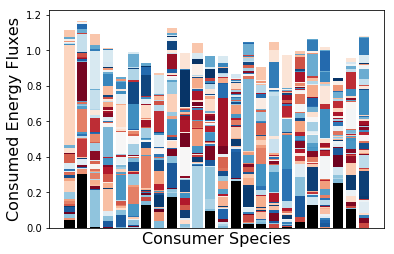

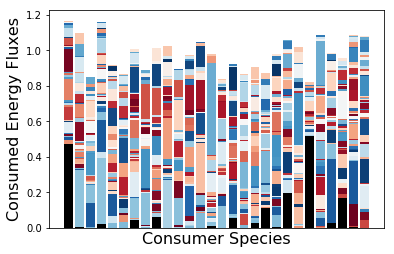

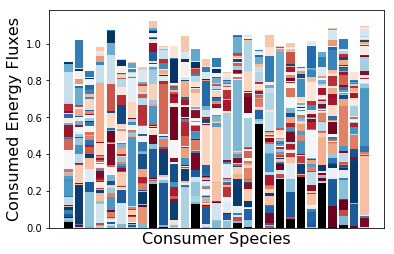

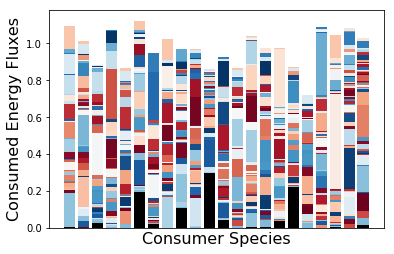

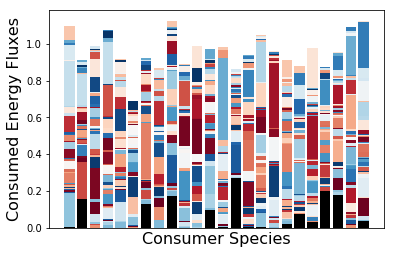

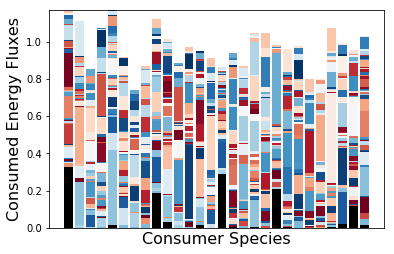

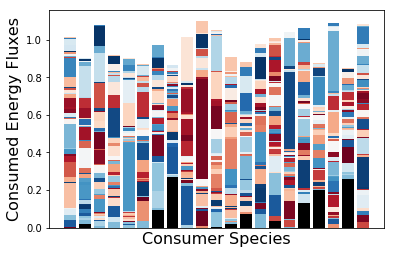

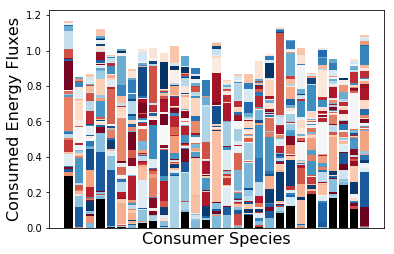

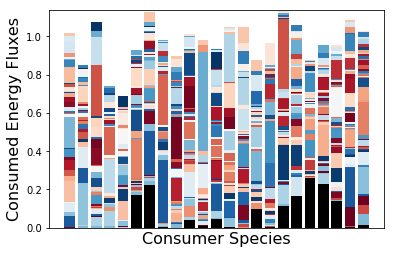

In [60]:
name = 'Gamma_sampling'
run = 90
colors = sns.color_palette("RdBu_r",99)
lookup = np.random.choice(np.arange(99),size=99,replace=False)

for well in ['W'+str(k) for k in range(10)]:
    fig,ax = plt.subplots()

    not_extinct = np.where(expt[name]['N'].loc[run][well].values > 0)[0]
    ind = np.arange(len(not_extinct))

    Jinvec = expt[name]['params'].loc[run]['e']*Jin(expt[name]['R'].loc[run][well].values,expt[name]['sim_params'])[not_extinct,0]
    bottom = Jinvec
    ax.bar(ind,Jinvec,color='k')

    for j in range(2,100):
        Jinvec = expt[name]['params'].loc[run]['e']*Jin(expt[name]['R'].loc[run][well].values,expt[name]['sim_params'])[not_extinct,j]
        ax.bar(ind,Jinvec,bottom = bottom, color = colors[lookup[j-1]])
        bottom += Jinvec
    ax.set_xticks(())
    ax.set_xlabel('Consumer Species',fontsize=16)
    ax.set_ylabel('Consumed Energy Fluxes',fontsize=16)
    #ax.plot(ind,par['m'][not_extinct],'k')
    
    plt.show()

## Comparison

In [12]:
supp_names = ['main_dataset','type_II','dense_metabolism','randomness','Gaussian_sampling','Gamma_sampling']

In [13]:
for name in supp_names:
    print(name + ' mean c = ' + str(expt[name]['sim_params']['c'].values.reshape(-1).mean()))
    print(name + ' stdev c = ' + str(expt[name]['sim_params']['c'].values.reshape(-1).std()))


main_dataset mean c = 0.1105
main_dataset stdev c = 0.300665511823
type_II mean c = 0.1061
type_II stdev c = 0.294728332537
dense_metabolism mean c = 0.1108
dense_metabolism stdev c = 0.301063714187
randomness mean c = 0.1083
randomness stdev c = 0.297719851538
Gaussian_sampling mean c = 0.111676636406
Gaussian_sampling stdev c = 0.298338479181
Gamma_sampling mean c = 0.112626451966
Gamma_sampling stdev c = 0.309396597246


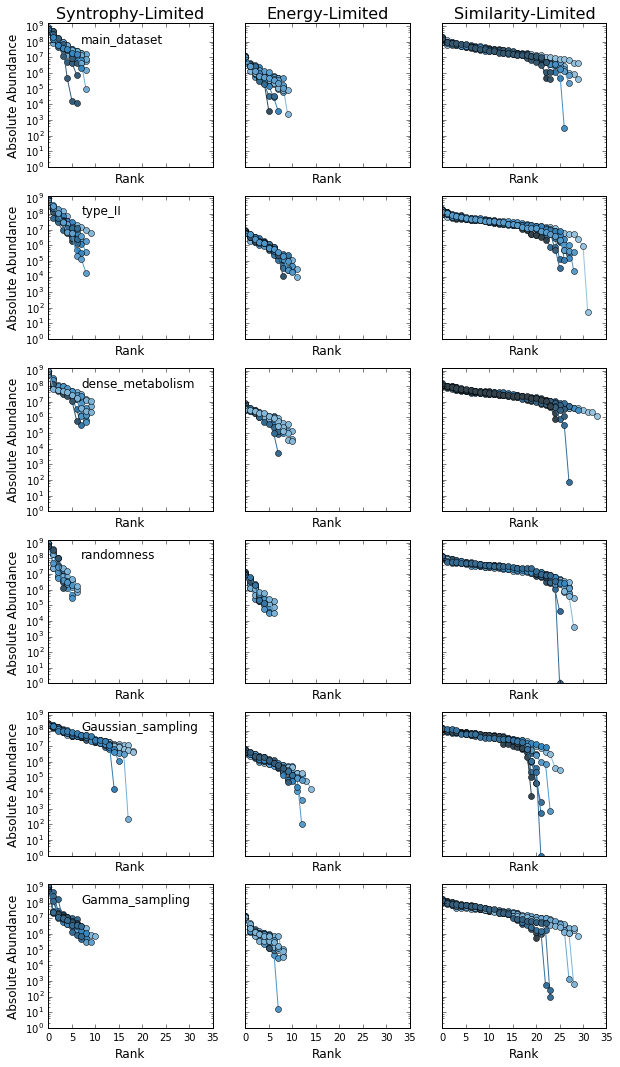

In [14]:
fig,axs = plt.subplots(6,3,figsize=(10,18),sharey=True,sharex=True)
#fig.subplots_adjust(bottom=0.2,left=0.2,right=0.89)

k = 0
for name in supp_names:
    if k == 0:
        titles = ['Energy-Limited','Syntrophy-Limited','Similarity-Limited']
    else:
        titles = ['','','']
    RankAbundance(expt[name]['Nflat']*1e6,expt[name]['metadata'],{'e':0.4,'K':28},title=titles[0],ax=axs[k,1],fs=12,thresh=0,normalize=False)
    RankAbundance(expt[name]['Nflat']*1e6,expt[name]['metadata'],{'e':0.9,'K':1000},title=titles[1],ax=axs[k,0],fs=12,thresh=0,normalize=False)
    RankAbundance(expt[name]['Nflat']*1e6,expt[name]['metadata'],{'e':0.1,'K':1000},title=titles[2],ax=axs[k,2],fs=12,thresh=0,normalize=False)
    axs[k,0].text(7,1e8,name,fontsize=12)
    axs[k,1].set_ylabel('')
    axs[k,2].set_ylabel('')
    #axs[k,0].set_ylim((1e-4,1))
    k += 1
axs[0,0].set_ylim((1,1.5e9))
pdf = bpdf.PdfPages('Plots/rank-abundance_comparison_absolute.pdf')
pdf.savefig(fig)
pdf.close()

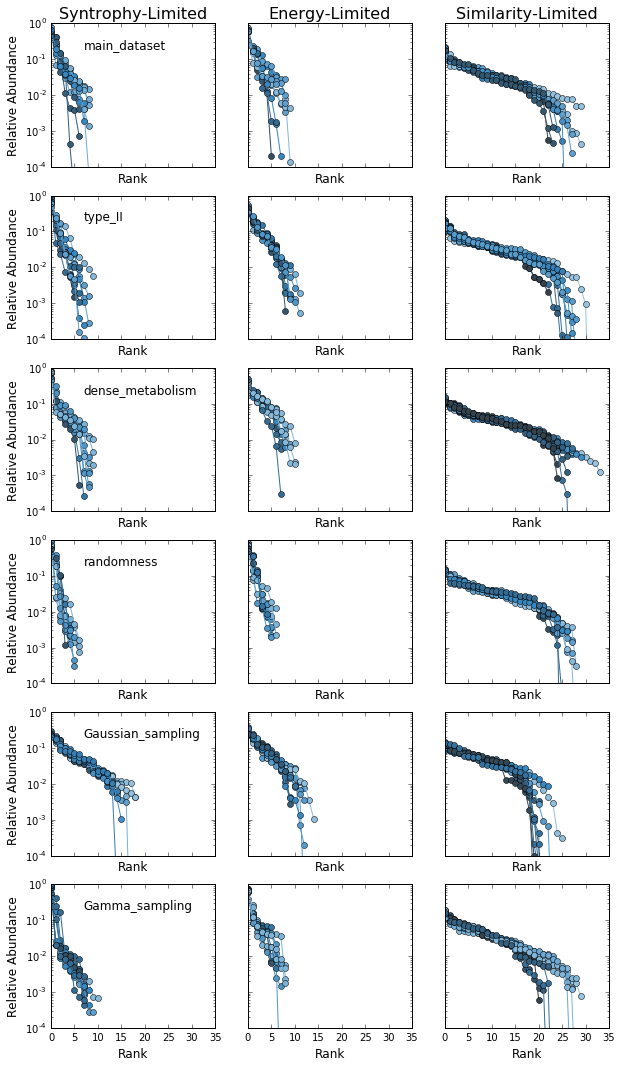

In [15]:
fig,axs = plt.subplots(6,3,figsize=(10,18),sharey=True,sharex=True)
#fig.subplots_adjust(bottom=0.2,left=0.2,right=0.89)

k = 0
for name in supp_names:
    if k == 0:
        titles = ['Energy-Limited','Syntrophy-Limited','Similarity-Limited']
    else:
        titles = ['','','']
    RankAbundance(expt[name]['Nflat'],expt[name]['metadata'],{'e':0.4,'K':28},title=titles[0],ax=axs[k,1],fs=12,thresh=0)
    RankAbundance(expt[name]['Nflat'],expt[name]['metadata'],{'e':0.9,'K':1000},title=titles[1],ax=axs[k,0],fs=12,thresh=0)
    RankAbundance(expt[name]['Nflat'],expt[name]['metadata'],{'e':0.1,'K':1000},title=titles[2],ax=axs[k,2],fs=12,thresh=0)
    axs[k,0].text(7,0.2,name,fontsize=12)
    axs[k,1].set_ylabel('')
    axs[k,2].set_ylabel('')
    axs[k,0].set_ylim((1e-4,1))
    k += 1
#axs[0].set_ylim((0.9e-5,1))
pdf = bpdf.PdfPages('Plots/rank-abundance_comparison.pdf')
pdf.savefig(fig)
pdf.close()

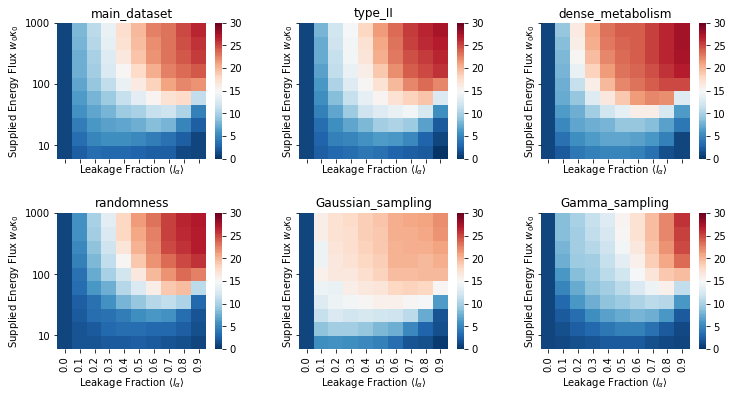

In [65]:
colors = sns.color_palette("RdBu_r",100)
fig,axs=plt.subplots(2,3,sharex=True,sharey=True,figsize=(12,6))
fig.subplots_adjust(wspace=0.3,hspace=0.4)
axs = axs.reshape(-1)

k=0
for name in supp_names:
    piv = pd.pivot_table(expt[name]['params'], values='Rich',index=["K"],columns=['Leakage'],fill_value=np.nan)
    sns.heatmap(piv, ax= axs[k], cmap=colors,cbar=True, vmin = 0, vmax = 30)
    axs[k].invert_yaxis()

    axs[k].set_xlabel(r'Leakage Fraction $\langle l_\alpha\rangle$')
    axs[k].set_ylabel(r'Supplied Energy Flux $w_0\kappa_0$')
    axs[k].set_title(name)
    axs[k].set_yticks((1,5.5,10))
    axs[k].set_yticklabels((10,100,1000))
    k+=1
pdf = bpdf.PdfPages('Plots/log_heatmap_comparison.pdf')
pdf.savefig(fig)
pdf.close()

plt.show()

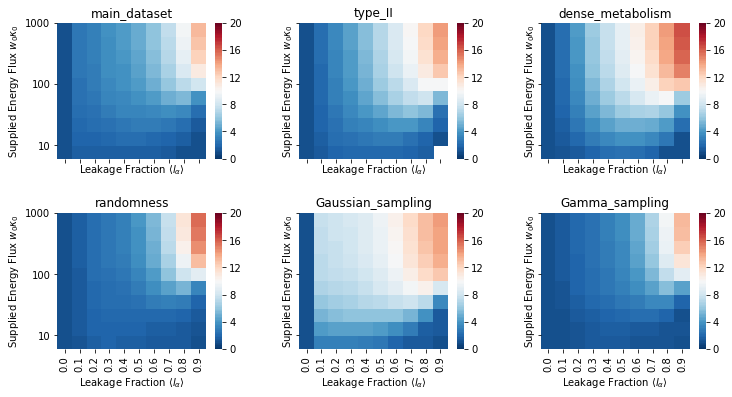

In [66]:
colors = sns.color_palette("RdBu_r",100)
fig,axs=plt.subplots(2,3,sharex=True,sharey=True,figsize=(12,6))
fig.subplots_adjust(wspace=0.3,hspace=0.4)
axs = axs.reshape(-1)

k=0
for name in supp_names:
    piv = pd.pivot_table(expt[name]['metadata'], values='Simpson',index=["K"],columns=['Leakage'],fill_value=np.nan)
    sns.heatmap(piv, ax= axs[k], cmap=colors,cbar=True, vmin = 0, vmax = 20)
    axs[k].invert_yaxis()

    axs[k].set_xlabel(r'Leakage Fraction $\langle l_\alpha\rangle$')
    axs[k].set_ylabel(r'Supplied Energy Flux $w_0\kappa_0$')
    axs[k].set_title(name)
    axs[k].set_yticks((1,5.5,10))
    axs[k].set_yticklabels((10,100,1000))
    k+=1
pdf = bpdf.PdfPages('Plots/log_heatmap_comparison_Simpson.pdf')
pdf.savefig(fig)
pdf.close()

plt.show()

/Users/robertmarsland/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
/Users/robertmarsland/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
/Users/robertmarsland/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
/Users/robertmarsland/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


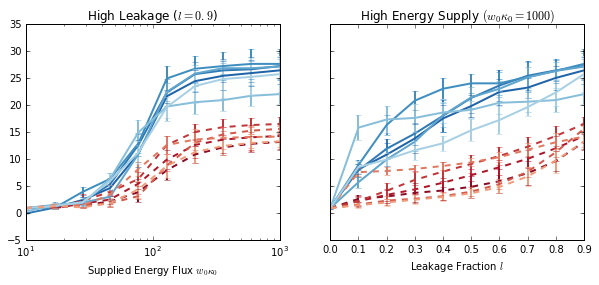

In [17]:
fig,axs=plt.subplots(1,2,sharey=True,figsize=(10,5))
plt.subplots_adjust(bottom=0.3)

colors = sns.color_palette("RdBu_r",20)

k=1
for name in supp_names:
    ax, means = PlotDiversity(expt[name]['metadata'],'Leakage',0.9,'K',metric_choice=['Richness','Simpson'],log=True,ax=axs[0],legend=True,colors=[colors[k],colors[-k]])
    PlotDiversity(expt[name]['metadata'],'K',1000,'Leakage',metric_choice=['Richness','Simpson'],log=False,ax=axs[1],colors=[colors[k],colors[-k]])
    k+=1
    
axs[0].legend_.remove()
axs[0].set_title(r'High Leakage ($l = 0.9$)', fontsize=12)
axs[1].set_title(r'High Energy Supply $(w_0\kappa_0=1000)$', fontsize=12)
axs[0].set_xlabel(r'Supplied Energy Flux $w_0\kappa_0$')
axs[1].set_xlabel(r'Leakage Fraction $l$')

pdf = bpdf.PdfPages('Plots/Simpson-diversity_comparison.pdf')
pdf.savefig(fig)
pdf.close()
plt.show()

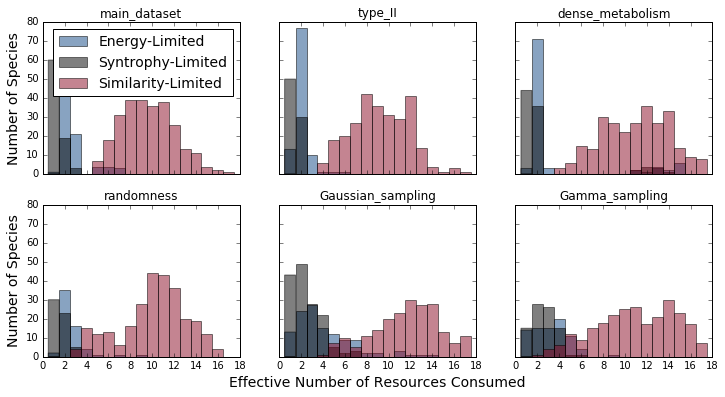

In [18]:
bins = np.linspace(0.5,17.5,18)
fig,axs=plt.subplots(2,3,sharex=True,sharey=True,figsize=(12,6))
#fig.subplots_adjust(wspace=0.3,hspace=0.4)
axs = axs.reshape(-1)

k=0
for name in supp_names:
    axs[k].hist(CalculateConsumptionMeff(expt[name]['N'].loc[23],expt[name]['R'].loc[23],expt[name]['sim_params']),normed=False,bins=bins,alpha=0.5,label = 'Energy-Limited',color=colors[0])
    axs[k].hist(CalculateConsumptionMeff(expt[name]['N'].loc[98],expt[name]['R'].loc[98],expt[name]['sim_params']),normed=False,bins=bins,alpha=0.5,label = 'Syntrophy-Limited',color='k')
    axs[k].hist(CalculateConsumptionMeff(expt[name]['N'].loc[90],expt[name]['R'].loc[90],expt[name]['sim_params']),normed=False,bins=bins,alpha=0.5,label = 'Similarity-Limited',color=colors[-1])
    axs[k].set_title(name)
    k+=1

axs[0].legend(fontsize=14)

axs[4].set_xlabel('Effective Number of Resources Consumed',fontsize=14)

axs[0].set_ylabel('Number of Species',fontsize=14)
axs[3].set_ylabel('Number of Species',fontsize=14)
pdf = bpdf.PdfPages('Plots/flux_diversity_comparison.pdf')
pdf.savefig(fig)
pdf.close()
plt.show()
plt.show()

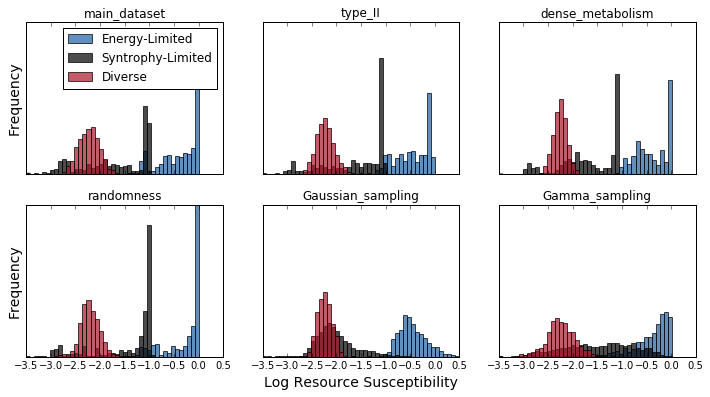

In [19]:
bins = np.linspace(-3.5,0.5,50)
colors = sns.color_palette("RdBu_r",10)

fig,axs=plt.subplots(2,3,sharex=True,sharey=True,figsize=(12,6))
#fig.subplots_adjust(wspace=0.3,hspace=0.4)
axs = axs.reshape(-1)

k=0
for name in supp_names:
    run = 23
    chi_diag, chi_off = CalculateSusceptibility(expt[name]['N'].loc[run],expt[name]['R'].loc[run],expt[name]['sim_params'])
    axs[k].hist(np.log10(np.abs(chi_diag)),alpha = 0.7,bins=bins,normed=True,label='Energy-Limited',color = colors[0])

    run = 98
    chi_diag, chi_off = CalculateSusceptibility(expt[name]['N'].loc[run],expt[name]['R'].loc[run],expt[name]['sim_params'])
    axs[k].hist(np.log10(np.abs(chi_diag)),alpha = 0.7,bins=bins,normed=True,label='Syntrophy-Limited',color = 'k')

    run = 90
    chi_diag, chi_off = CalculateSusceptibility(expt[name]['N'].loc[run],expt[name]['R'].loc[run],expt[name]['sim_params'])
    axs[k].hist(np.log10(np.abs(chi_diag)),alpha = 0.7,bins=bins,normed=True,label='Diverse',color=colors[-1])
    axs[k].set_title(name)
    axs[k].set_yticks(())
    k+=1

axs[0].set_ylabel('Frequency',fontsize=14)
axs[3].set_ylabel('Frequency',fontsize=14)
axs[4].set_xlabel('Log Resource Susceptibility',fontsize=14)



axs[0].legend(fontsize=12)

pdf = bpdf.PdfPages('Plots/susceptibility_comparison.pdf')
pdf.savefig(fig)
pdf.close()
plt.show()

# Finite-Size Scaling

In [23]:
def LoadFiniteScaling(task_id,date='2018-08-07',folder='data'):

    N,R,params=LoadData(folder,date,task_id=task_id,load_c=False)
    params.index=list(range(len(params)))
    N.index=pd.MultiIndex.from_tuples([(params.index[k],'S'+str(j)) for k in range(len(params)) for j in range(params['M'].loc[0]*2) ])
    R.index=pd.MultiIndex.from_tuples([(params.index[k],'R'+str(j)) for k in range(len(params)) for j in range(params['M'].loc[0]) ])
    Nflat, Rflat, metadata = FlatResult(N,R,params)
    metadata['Leakage'] = 1-np.round(metadata['e'],decimals=1)
    params['Leakage'] = np.round(1-params['e'],decimals=1)
    
    return {int(metadata['M'].iloc[0]): {'N':N,'R':R,'params':params,'Nflat':Nflat,'Rflat':Rflat,'metadata':metadata}}

#Load first scaling run
for task_id in range(6,20):
    try:
        expt.update(LoadFiniteScaling(task_id)) 
    except:
        try:
            expt.update(LoadFiniteScaling(task_id,date='2018-08-08')) 
        except:
            print('Task '+str(task_id)+' does not exist')
for name in expt.keys():    
    if type(name) != str:
        expt[name]['metadata_R'] = CalculateDiversity(expt[name]['Rflat'],expt[name]['metadata'])
        expt[name]['metadata_N'] = CalculateDiversity(expt[name]['Nflat'],expt[name]['metadata'])

#Compile to single table
metadata_R = pd.DataFrame()
metadata_N = pd.DataFrame()
params = pd.DataFrame()
for name in expt.keys():    
    if type(name) != str:
        #Scale energy supply by M
        expt[name]['metadata_R']['K']=np.around(expt[name]['metadata_R']['K']/expt[name]['metadata']['M'],decimals=2)
        expt[name]['metadata_N']['K']=np.around(expt[name]['metadata_N']['K']/expt[name]['metadata']['M'],decimals=2)
        expt[name]['params']['K']=np.around(expt[name]['params']['K']/expt[name]['params']['M'],decimals=2)
        metadata_R = metadata_R.append(expt[name]['metadata_R'],ignore_index=True)
        metadata_N = metadata_N.append(expt[name]['metadata_N'],ignore_index=True)
        params = params.append(expt[name]['params'],ignore_index=True)

metadata_R['Leakage']=np.around(metadata_R['Leakage'],decimals=1)
metadata_N['Leakage']=np.around(metadata_N['Leakage'],decimals=1)    

#Save
metadata_R.to_excel('scaling_R.xlsx')
metadata_N.to_excel('scaling_N.xlsx')
with open('data/expt_scaling_2.dat','wb') as f:
    pickle.dump(expt,f)


Task 12 does not exist


/Users/robertmarsland/Documents/GitHub/community-simulator/community_simulator/analysis.py:115: RuntimeWarning: invalid value encountered in true_divide
  p = N/np.sum(N)
/Users/robertmarsland/Documents/GitHub/community-simulator/community_simulator/analysis.py:119: RuntimeWarning: invalid value encountered in true_divide
  p = N/np.sum(N)
/Users/robertmarsland/Documents/GitHub/community-simulator/community_simulator/analysis.py:120: RuntimeWarning: invalid value encountered in greater
  p = p[p>0]
/Users/robertmarsland/Documents/GitHub/community-simulator/community_simulator/analysis.py:124: RuntimeWarning: invalid value encountered in true_divide
  p = N/np.sum(N)


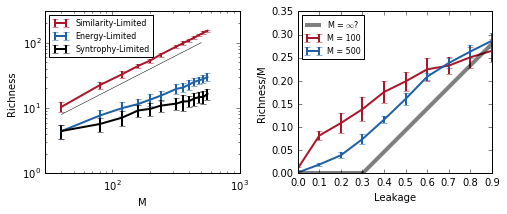

In [24]:
fig,ax=plt.subplots(1,2,figsize=(8,3))
fig.subplots_adjust(wspace=0.3,bottom=0.15)
colors = sns.color_palette("RdBu_r",10)

for name in ['Syntrophy-Limited','Similarity-Limited','Energy-Limited']:
    metadata_N[name] = metadata_N['Richness']

ax[0], mean_sim = PlotDiversity(metadata_N[metadata_N['Leakage']==0.9].fillna(value=0),'K',10.0,'M',metric_choice=['Similarity-Limited'],log=False,ax=ax[0],colors=[colors[-1],colors[-1],colors[-1]])
ax[0], mean_en = PlotDiversity(metadata_N[metadata_N['Leakage']==0.6].fillna(value=0),'K',0.28,'M',metric_choice=['Energy-Limited'],log=False,ax=ax[0],colors=[colors[0],colors[0],colors[0]])
ax[0], mean_syn = PlotDiversity(metadata_N[metadata_N['Leakage']==0.1].fillna(value=0),'K',10.00,'M',metric_choice=['Syntrophy-Limited'],log=False,ax=ax[0],colors=['k'])
ax[0].plot([40,500],0.2*np.asarray([40,500]),'k',linewidth=0.5)
ax[0].set_ylabel('Richness')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylim((1,300))
ax[0].set_xlim((30,1000))

ax[0].legend(loc=2,fontsize=8)

for name in ['main_dataset','M_500']:
    expt[name+'_scaled'] = expt[name].copy()
    expt[name+'_scaled']['metadata']['Richness'] = expt[name+'_scaled']['metadata']['Richness']/expt[name+'_scaled']['metadata']['M'].loc[0]

expt['main_dataset_scaled']['metadata']['M = 100'] = expt['main_dataset_scaled']['metadata']['Richness']
expt['M_500_scaled']['metadata']['M = 500'] = expt['M_500_scaled']['metadata']['Richness']

lc = 0.3

ax[1], mean = PlotDiversity(expt['main_dataset_scaled']['metadata'],'K',1000.0,'Leakage',metric_choice=['M = 100'],log=False,ax=ax[1],colors=[colors[-1]],linestyles=['-'])
ax[1], mean = PlotDiversity(expt['M_500_scaled']['metadata'],'K',5000.0,'Leakage',metric_choice=['M = 500'],log=False,ax=ax[1],colors=[colors[0]],linestyles=['-'])
ax[1].plot([0,lc],[0,0],'k',alpha=0.5,label=r'M = $\infty$?',lw=4)
ax[1].plot([lc,0.9],[0,0.28],'k',alpha=0.5,lw=4)
ax[1].set_ylabel('Richness/M')
ax[1].legend(loc=2,fontsize=8)

pdf = bpdf.PdfPages('Plots/finite-scaling.pdf')
pdf.savefig(fig)
pdf.close()

plt.show()

/Users/robertmarsland/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


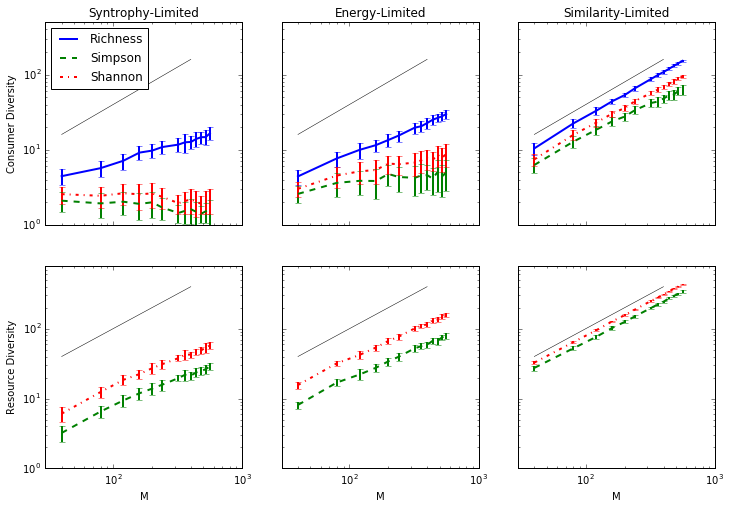

In [20]:
import warnings

fig,ax=plt.subplots(2,3,figsize=(12,8),sharey='row',sharex=True)
#fig.subplots_adjust(wspace=0.4)
metadata_R['Richness']=np.nan

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    ax[1,2], mean = PlotDiversity(metadata_R[metadata_R['Leakage']==0.9],'K',10.00,'M',metric_choice=['Richness','Simpson','Shannon'],log=False,ax=ax[1,2])
    ax[1,1], mean = PlotDiversity(metadata_R[metadata_R['Leakage']==0.6],'K',0.28,'M',metric_choice=['Richness','Simpson','Shannon'],log=False,ax=ax[1,1])
    ax[1,0], mean = PlotDiversity(metadata_R[metadata_R['Leakage']<0.2],'K',10.00,'M',metric_choice=['Richness','Simpson','Shannon'],log=False,ax=ax[1,0])

    ax[0,2], mean_d = PlotDiversity(metadata_N[metadata_N['Leakage']==0.9],'K',10.00,'M',metric_choice=['Richness','Simpson','Shannon'],log=False,ax=ax[0,2])
    ax[0,1], mean_e = PlotDiversity(metadata_N[metadata_N['Leakage']==0.6],'K',0.28,'M',metric_choice=['Richness','Simpson','Shannon'],log=False,ax=ax[0,1])
    ax[0,0], mean_l = PlotDiversity(metadata_N[metadata_N['Leakage']<0.2],'K',10.00,'M',metric_choice=['Richness','Simpson','Shannon'],log=False,ax=ax[0,0],legend=True)

ax[0,2].set_title('Similarity-Limited')
ax[0,1].set_title('Energy-Limited')
ax[0,0].set_title('Syntrophy-Limited')

ax[1,0].set_ylim((1,800))
ax[0,0].set_ylim((1,500))
ax[0,0].set_xlim((30,1000))

for k in range(3):
    ax[0,k].plot(np.arange(40,400),0.4*np.arange(40,400),'k',linewidth=0.5)
    ax[1,k].plot(np.arange(40,400),np.arange(40,400),'k',linewidth=0.5)
    ax[0,k].set_ylabel('Consumer Diversity')
    ax[0,k].set_xscale('log')
    ax[0,k].set_yscale('log')
    ax[1,k].set_ylabel('Resource Diversity')
    ax[1,k].set_xscale('log')
    ax[1,k].set_yscale('log')
pdf = bpdf.PdfPages('Plots/diversity_scaling.pdf')
pdf.savefig(fig)
pdf.close()
plt.show()

# Check Convergence

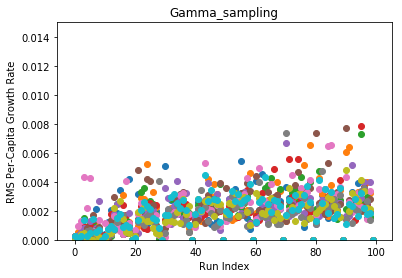

In [70]:
name = 'Gamma_sampling'
assumptions = {'regulation':'independent','replenishment':'renew','response':'type '+file_list.loc[name]['Response']}
def dNdt(N,R,params):
    return MakeConsumerDynamics(**assumptions)(N,R,params)
def dRdt(N,R,params):
    return MakeResourceDynamics(**assumptions)(N,R,params)
dynamics = [dNdt,dRdt]

params = expt[name]['sim_params'].copy()
params['c'] = params['c'].values
params['D'] = params['D'].values

err = pd.DataFrame()
for well in expt[name]['N'].keys():
    temp = []
    for run in expt[name]['params'].index:
        params['e'] = expt[name]['params'].loc[run]['e']
        species_exist = np.where(expt[name]['N'].loc[run][well].values.squeeze() > 0)[0]
        temp.append(np.sqrt(np.sum((dNdt(expt[name]['N'].loc[run][well].values.squeeze(),expt[name]['R'].loc[run][well].values.squeeze(),params)[species_exist]/expt[name]['N'].loc[run][well].values.squeeze()[species_exist])**2)))
    err[well] = temp
    
fig,ax = plt.subplots()
for well in err.keys():
    ax.scatter(err[well].index,err[well].values)
ax.set_ylim(0,0.015)
ax.set_title(name)
ax.set_xlabel('Run Index')
ax.set_ylabel('RMS Per-Capita Growth Rate')

pdf = bpdf.PdfPages('Plots/Gamma_error.pdf')
pdf.savefig(fig)
pdf.close()
plt.show()

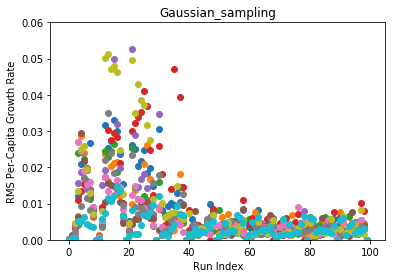

In [71]:
name = 'Gaussian_sampling'
assumptions = {'regulation':'independent','replenishment':'renew','response':'type '+file_list.loc[name]['Response']}
def dNdt(N,R,params):
    return MakeConsumerDynamics(**assumptions)(N,R,params)
def dRdt(N,R,params):
    return MakeResourceDynamics(**assumptions)(N,R,params)
dynamics = [dNdt,dRdt]

params = expt[name]['sim_params'].copy()
params['c'] = params['c'].values
params['D'] = params['D'].values

err = pd.DataFrame()
for well in expt[name]['N'].keys():
    temp = []
    for run in expt[name]['params'].index:
        params['e'] = expt[name]['params'].loc[run]['e']
        species_exist = np.where(expt[name]['N'].loc[run][well].values.squeeze() > 0)[0]
        temp.append(np.sqrt(np.sum((dNdt(expt[name]['N'].loc[run][well].values.squeeze(),expt[name]['R'].loc[run][well].values.squeeze(),params)[species_exist]/expt[name]['N'].loc[run][well].values.squeeze()[species_exist])**2)))
    err[well] = temp
    
fig,ax = plt.subplots()
for well in err.keys():
    ax.scatter(err[well].index,err[well].values)
ax.set_ylim(0,0.06)
ax.set_title(name)
ax.set_xlabel('Run Index')
ax.set_ylabel('RMS Per-Capita Growth Rate')

pdf = bpdf.PdfPages('Plots/Gaussian_error.pdf')
pdf.savefig(fig)
pdf.close()
plt.show()

In [37]:
run = 15

#Construct dynamics
assumptions = {'regulation':'independent','replenishment':'renew','response':'type I'}
def dNdt(N,R,params):
    return MakeConsumerDynamics(**assumptions)(N,R,params)
def dRdt(N,R,params):
    return MakeResourceDynamics(**assumptions)(N,R,params)
dynamics = [dNdt,dRdt]
par = expt[name]['sim_params'].copy()
par['e']=expt[name]['params'].loc[run]['e']
par['R0'][0] = expt[name]['params'].loc[run]['K']
MyPlate = Community([expt[name]['N'].loc[run],expt[name]['R'].loc[run]],dynamics,par)
Ntraj,Rtraj = MyPlate.RunExperiment(np.eye(10),0.1,20,refresh_resource=False)

plt.show()

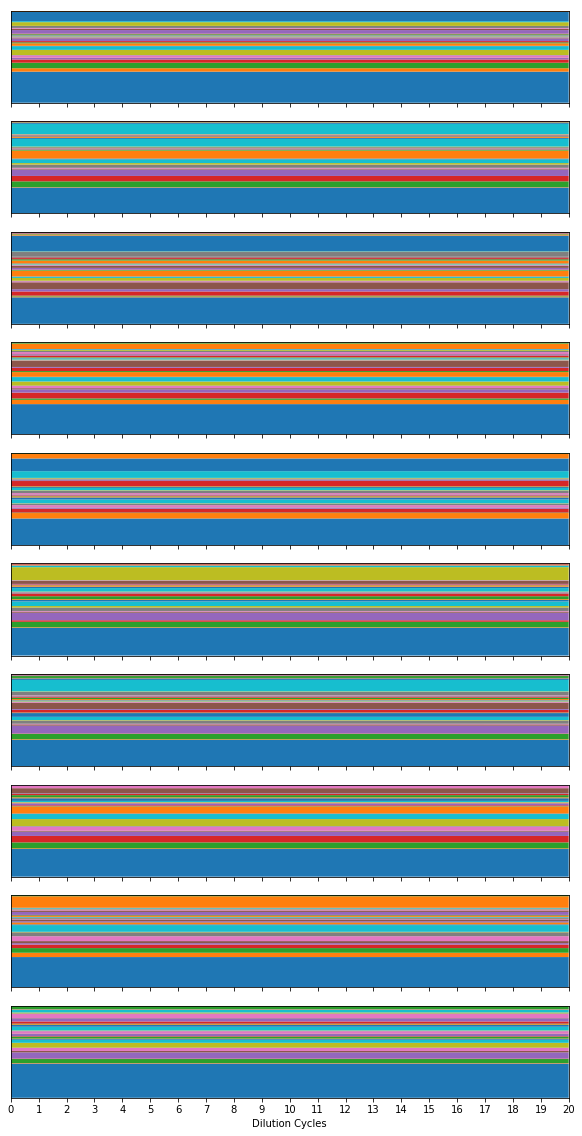

In [45]:
from community_simulator.visualization import PlotTraj

Ntraj,Rtraj = MyPlate.RunExperiment(np.eye(10),0.01,20,refresh_resource=False)
PlotTraj(Rtraj)
plt.show()

# Check maintenance cost of final species

Plot maintenance cost against fraction of community taken up by the species. Color by richness of community. Repeat for all parameter values in heat map.

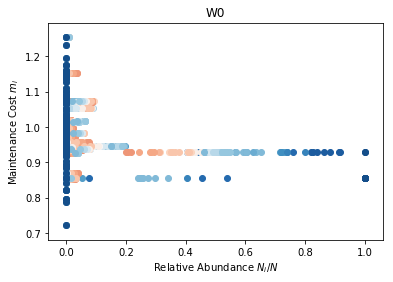

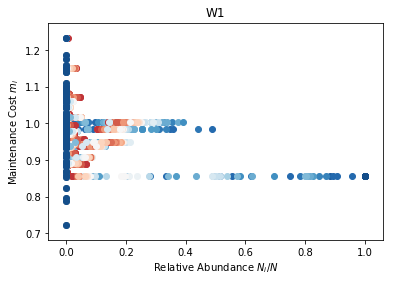

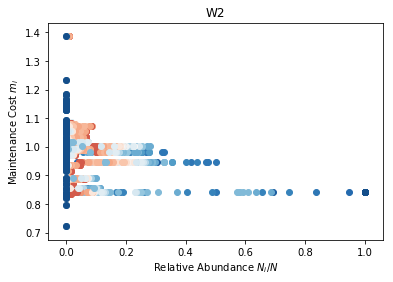

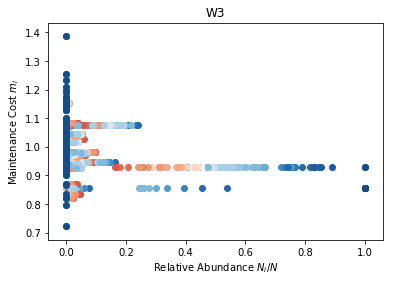

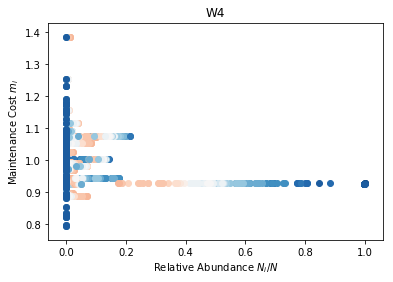

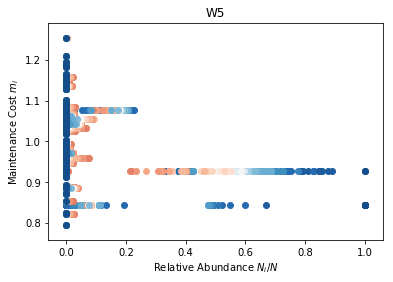

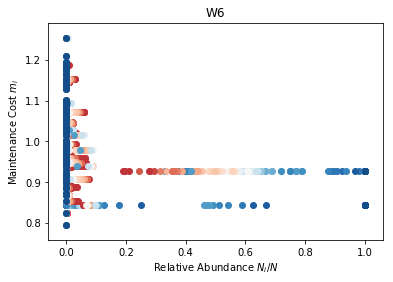

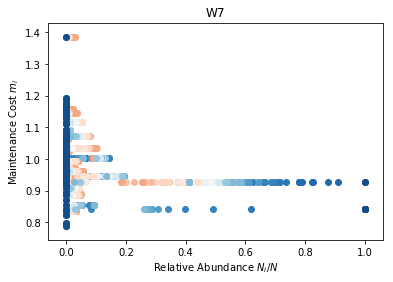

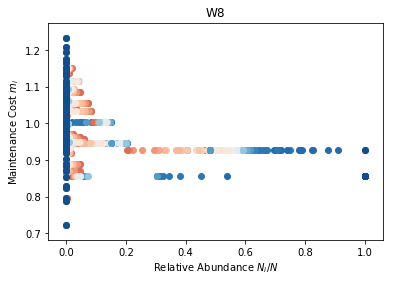

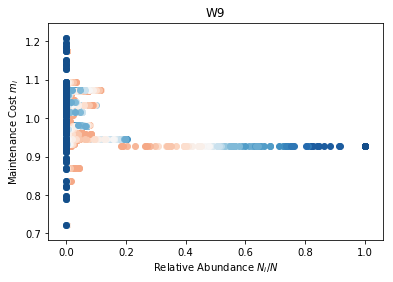

In [37]:
N0 = pd.read_excel('data/Initial_State_2018-03-20_1.xlsx',index_col=[0,1],header=0)

colors = sns.color_palette("RdBu_r",35)
for well in ['W'+str(j) for j in range(10)]:
    mwell = expt['main_dataset']['sim_params']['m'][N0[well]==1]
    fig,ax=plt.subplots()
    ax.set_title(well)
    for run in range(100):
        Nwell = expt['main_dataset']['N'][well].loc[run].loc[N0[well]==1]
        Nwell = Nwell/Nwell.sum()
        ax.scatter(Nwell.values,mwell,color=colors[int(np.sum(Nwell.values>0))])
    ax.set_xlabel(r'Relative Abundance $N_i/N$')
    ax.set_ylabel(r'Maintenance Cost $m_i$')
    plt.show()